# EDA Notes

A first attempt at EDA for the CS109 final project. 

In [46]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
%matplotlib inline

**Read In Data**

In [56]:
checkins = pd.read_csv('Data/checkin_summary.csv', header=None)
photos = pd.read_csv('Data/photos_summary.csv', header=None)
reviews = pd.read_csv('Data/review_small.csv', header=None)
biz = pd.read_csv('Data/small_businesses.csv')
tips = pd.read_csv('Data/tip_summary.csv', header=None)
users = pd.read_json(path_or_buf='Data/user_small.json', lines=True)

/Users/maiawoluchem/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,10,12,14,20,63,64,74) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Explore data in its current state

In [48]:
checkins.shape, photos.shape, reviews.shape, biz.shape, tips.shape, users.shape

((49414, 2), (26384, 2), (2927859, 4), (38668, 93), (558979, 3), (1183362, 5))

In [49]:
checkins.columns = ['business_id', 'num_checkins'] 
checkins.head()

,business_id,num_checkins
0,--6MefnULPED_I942VcFNA,122
1,--9e1ONYQuAa-CB_Rrw7Tw,2469
2,--DaPTJW3-tB1vP-PfdTEg,88
3,--FBCX-N37CMYDfs790Bnw,477
4,--GM_ORV2cYS-h38DSaCLw,13


In [50]:
photos.columns = ['business_id', 'num_photos'] 
photos.head()

,business_id,num_photos
0,--6MefnULPED_I942VcFNA,1
1,--9e1ONYQuAa-CB_Rrw7Tw,127
2,--DaPTJW3-tB1vP-PfdTEg,1
3,--FBCX-N37CMYDfs790Bnw,4
4,--KCl2FvVQpvjzmZSPyviA,3


In [51]:
reviews.columns = ['user_id', 'business_id', 'rating', 'date'] 
reviews.head()

,user_id,business_id,rating,date
0,V2exkc2JwEdc8UNUNhT7sg,--6MefnULPED_I942VcFNA,5,2016-08-25
1,j97y1ZAsYABIOcR0KQCy5Q,--6MefnULPED_I942VcFNA,1,2010-12-06
2,8-KBKMJVO-j5YqpHb08j9w,--6MefnULPED_I942VcFNA,4,2015-08-05
3,CxDOIDnH8gp9KXzpBHJYXw,--6MefnULPED_I942VcFNA,2,2010-12-22
4,7Dykd1HolQx8mKPYhYDYSg,--6MefnULPED_I942VcFNA,2,2017-02-07


In [57]:
#biz.rename(columns = lambda x : str(x)[:11])
biz.columns=biz.columns.str.replace('attributes.','')
biz.columns=biz.columns.str.replace('.',"_")
#biz2 = biz.replace(np.nan, '', regex=True)


#biz['divey2'] = 1*biz['Ambience_divey']
#biz2 = biz['divey2'].replace(np.nan, np.nan, regex=True)
#biz2.head()

In [67]:
biz.dtypes

Ambience_divey                 object
RestaurantsDelivery            object
Ambience_trendy                object
postal_code                    object
city                           object
GoodForKids                    object
Ambience_casual                object
stars                         float64
latitude                      float64
Alcohol                        object
RestaurantsPriceRange2        float64
Ambience_classy                object
RestaurantsTableService        object
GoodForMeal_latenight          object
GoodForMeal_dessert            object
Ambience_touristy              object
BusinessParking_validated      object
GoodForMeal_lunch              object
RestaurantsGoodForGroups       object
categories                     object
GoodForMeal_brunch             object
name                           object
BusinessParking_valet          object
WheelchairAccessible           object
Ambience_intimate              object
Ambience_hipster               object
BusinessAcce

In [58]:
#Drop where more than 75 percent missing
biz = biz.dropna(thresh=len(biz) - 29001, axis=1)

In [70]:
test_vars = ['Ambience_divey', 'RestaurantsDelivery', 'Ambience_trendy','Ambience_classy','RestaurantsTableService','GoodForMeal_latenight','GoodForMeal_dessert','Ambience_touristy']              


In [74]:
for var in test_vars:
    biz[var] = 1*biz[var]
    
biz2 = biz[test_vars].replace(np.nan, np.nan, regex=True)
biz2.head()

,Ambience_divey,RestaurantsDelivery,Ambience_trendy,Ambience_classy,RestaurantsTableService,GoodForMeal_latenight,GoodForMeal_dessert,Ambience_touristy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [64]:

#biz['Ambience_divey'] = 1*biz['Ambience_divey']

biz2 = biz['Ambience_divey'].replace(np.nan, np.nan, regex=True)
#biz['divey2'].astype(int)
biz2.head()
biz2.dtypes

dtype('float64')

In [ ]:
object_vars = biz.drop(float_vars, axis=1)
object_df = object_df.drop(int_vars,axis=1)

In [66]:
biz.head()

Ambience_divey                 object
RestaurantsDelivery            object
Ambience_trendy                object
postal_code                    object
city                           object
GoodForKids                    object
Ambience_casual                object
stars                         float64
latitude                      float64
Alcohol                        object
RestaurantsPriceRange2        float64
Ambience_classy                object
RestaurantsTableService        object
GoodForMeal_latenight          object
GoodForMeal_dessert            object
Ambience_touristy              object
BusinessParking_validated      object
GoodForMeal_lunch              object
RestaurantsGoodForGroups       object
categories                     object
GoodForMeal_brunch             object
name                           object
BusinessParking_valet          object
WheelchairAccessible           object
Ambience_intimate              object
Ambience_hipster               object
BusinessAcce

In [33]:

booleandf = biz.select_dtypes(include=[bool])
booleanDictionary = {True: 'TRUE', False: 'FALSE'}

for column in booleandf:
    biz[column] = biz[column].map(booleanDictionary)

In [36]:
biz.head()

,Ambience_divey,HairSpecializesIn_kids,RestaurantsDelivery,Open24Hours,Ambience_trendy,DogsAllowed,CoatCheck,postal_code,Smoking,DietaryRestrictions_halal,...,BestNights_wednesday,DietaryRestrictions_vegan,Ambience_romantic,Music_jukebox,Ambience_upscale,RestaurantsTakeOut,BikeParking,OutdoorSeating,smoking2,divey2
0,False,,False,,False,,False,28105,,,...,,,False,False,False,True,True,False,,0
1,,,,,,,,28164,,,...,,,,,,,,False,,
2,True,,False,,False,,,15224,,,...,,,False,,False,True,True,False,,1
3,,,False,,,,,L5W 0E6,,,...,,,,,,True,,True,,
4,False,,False,,False,,,53704,,,...,,,False,,False,True,True,False,,0


In [41]:
test.head()

,Ambience_divey,HairSpecializesIn_kids,RestaurantsDelivery,Open24Hours,Ambience_trendy,DogsAllowed,CoatCheck,postal_code,Smoking,DietaryRestrictions_halal,...,BestNights_wednesday,DietaryRestrictions_vegan,Ambience_romantic,Music_jukebox,Ambience_upscale,RestaurantsTakeOut,BikeParking,OutdoorSeating,smoking2,divey2
0,False,NaN,False,NaN,False,NaN,False,NaN,NaN,NaN,...,NaN,NaN,False,False,False,True,True,False,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
2,True,NaN,False,NaN,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,False,True,True,False,NaN,1
3,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN
4,False,NaN,False,NaN,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,False,True,True,False,NaN,0


In [39]:
test.dtypes

Ambience_divey                       object
HairSpecializesIn_kids               object
RestaurantsDelivery                  object
Open24Hours                          object
Ambience_trendy                      object
DogsAllowed                          object
CoatCheck                            object
postal_code                          object
Smoking                              object
DietaryRestrictions_halal            object
HairSpecializesIn_straightperms      object
city                                 object
HairSpecializesIn_curly              object
Music_no_music                       object
HairSpecializesIn_coloring           object
GoodForKids                          object
BestNights_sunday                    object
BYOB                                 object
Ambience_casual                      object
AgesAllowed                          object
HairSpecializesIn_africanamerican    object
stars                                object
latitude                        

In [23]:
#biz.divey2.head()
#biz.dtypes
#list(biz.columns)

0      0
1    NaN
2      1
3    NaN
4      0
Name: divey2, dtype: object

In [ ]:
#biz.isnull().sum()

In [ ]:
biz.shape

In [ ]:
biz.isnull().sum()

In [ ]:
biz.dtypes

In [ ]:
#biz.Ambience_divey.unique()
float_vars = ['stars','latitude','RestaurantsPriceRange2','longitude']
int_vars = ['is_open','review_count']
object_df = biz.drop(float_vars, axis=1)
object_df = object_df.drop(int_vars,axis=1)
#object_vars = biz.drop()
#object_vars = object_vars.remove(float_vars)
#test_set = biz[float_vars]
#object_set = biz

In [ ]:
#object_df = object_df.col.dropna().apply(lambda x: str(int(x)) )
#object_df.astype(int)
#object_df = object_df.dropna().apply(lambda x: str(int(x)))
#booleanDictionary = {True: 'TRUE', False: 'FALSE'}
#object_df = object_df.replace(booleanDictionary)
#object_df.astype(str)
#object_df.applymap(lambda x: 1 if x else np.nan)
#object_df.astype(int).dtypes

In [ ]:
object_df.head()

In [ ]:
#Drop unnecessary businesses
object_df.dtypes
drop_columns = ['postal_code','city','business_id','name','categories','neighborhood','state']
object_df = object_df.drop(drop_columns,axis=1)


In [ ]:
object_df.astype(str)

In [ ]:
def boolstr_to_floatstr(v):
    if v == 'True':
        return '1.0'
    elif v == 'False':
        return '0.0'
    else:
        return np.nan

In [ ]:
new_data = np.vectorize(boolstr_to_floatstr)(object_df).astype(float)

In [ ]:
biz.shape

In [ ]:
new_data.types

ValueError: zero-size array to reduction operation minimum which has no identity

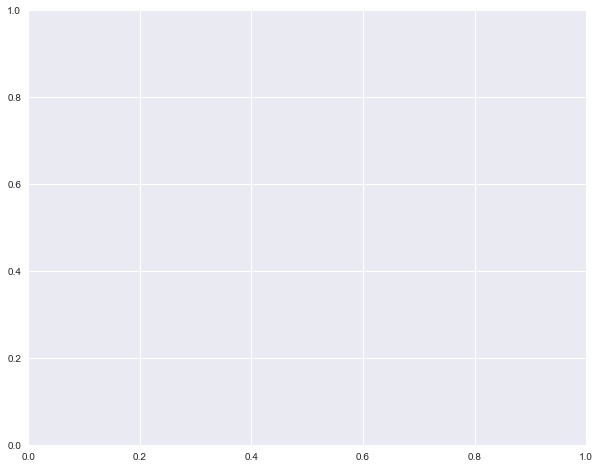

In [76]:
#biz2.categories
import seaborn as sns
interesting_columns = biz2.columns
fig, ax = plt.subplots(1,1, figsize=(10,8))
sns.heatmap(np.corrcoef(biz2.T), ax=ax)
ax.set_xticklabels(interesting_columns, rotation='vertical')
ax.set_yticklabels(interesting_columns[::-1], rotation='horizontal')
plt.show()

"""interesting_columns = biz.drop(float_vars, axis=1).columns
fig, ax = plt.subplots(1,1, figsize=(10,8))
sns.heatmap(np.corrcoef(biz.drop(float_vars, axis=1).T), ax=ax)
ax.set_xticklabels(interesting_columns, rotation='vertical')
ax.set_yticklabels(interesting_columns[::-1], rotation='horizontal')
plt.show()"""

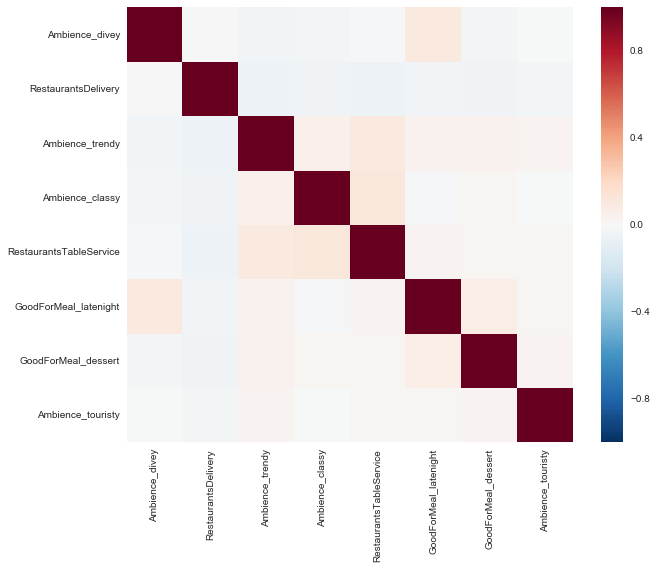

In [77]:
fig, ax = plt.subplots(1,1, figsize =(10,8))
sns.heatmap(biz2.corr(), ax=ax)

In [ ]:
tips.columns = ['business_id', 'user_id', 'unidentifiedinfo_tips'] 

tips['business_id'] = tips['business_id'].map(lambda x: x[1:])
tips['user_id'] = tips['user_id'].map(lambda x: x[:-1])
tips.head()

In [ ]:
users.head()

In [ ]:
"""
Based on this knowledge, the following EDA steps may be necessary:

1. Label column headers - 
    a. Check-ins: User_ID, # of Check-ins
    b. Photos: User_ID, # of Photos
    c. Review: Business_ID?, User_ID?, Stars, Date (of the review?)
    d. Biz: Use column headers from dataset
    e. Tips: Business_ID, User_ID, # of tips?
    
    Questions that arise:
    - We have a wide range in the number of records across sets. Is it because 
    of the number of businesses, number of users, or both? We should confirm
    the population of each set and make sure we're clear on that in this EDA.
    
2. Merge variables as needed - 
    a. It may be easiest to work with one large dataset that is at the user-level
    that contains all of the information that we need. If so, the following pieces
    may be necessary:
    b. Determine what level we should be working at - user, review, or business
        i. Seems like we should be at the user-level, in which case, will we have 
        multiple duplicates for the users depending on how many reviews we have?
    c. Merge depending on level determined.
    
    Questions that arise:
    - 
    
3. Basic cleaning - 
    a. Do we have duplicates in any of these datasets? If so, why?
    b. Missing values - 
        i. Due to that merging, we should have missing values in some users
        ii. Figure out a strategy for dealing with those missing values. 
    
4. Do basic EDA - 

    a. How many unique users? Businesses? Reviews? 
    b. User behavior - 
        i. What do the most and least active users look like? Are they enthusiastic?
            Do they travel? 
        ii. Do a user's reviews tend to favor a particular style of restaurant 
            (is there a clustering of taste inherent in the data already)?
        iii. What do reviews look like? Are there certain variables that are 
            are always missing? 
    
    Questions that arise:
        - Do we have enough information about folks to adequately make these predictions?
            What else might we need to impute?
            
